### Scroll Down Below to start from Activity 8.01

In [1]:
# Removes Warnings
import warnings
warnings.filterwarnings('ignore')
#import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv(r'Telco_Churn_Data.csv')
data.head(5)

,Target Churn,Target Code,Current Bill Amt,Avg Calls,Avg Calls Weekdays,Account Age,Percent Increase MOM,Acct Plan Subtype,Complaint Code,Avg Days Delinquent,Current TechSupComplaints,Current Days OpenWorkOrders,Equipment Age,Condition of Current Handset,Avg Hours WorkOrderOpenned
0,No Churn,0,14210,17950.000000,30297.0000,24,-0.334193,Gold,Billing Problem,6.2,0,0.0,8,1.0,0.0
1,Churn,1,14407,0.000000,0.0000,28,0.000000,Silver,Moving,1.0,0,0.0,17,1.0,0.0
2,Churn,1,12712,204.666667,10393.6667,23,0.000000,Gold,Billing Problem,17.6,0,0.0,23,1.0,0.0
3,No Churn,0,13807,15490.333300,41256.3333,39,0.148986,Silver,Billing Problem,0.0,0,0.0,17,1.0,0.0
4,No Churn,0,3805,5075.000000,12333.3333,23,-0.686047,Gold,Billing Problem,3.8,0,0.0,10,1.0,0.0


In [3]:
len(data)

4708

In [4]:
data.shape

(4708, 15)

In [5]:
data.isnull().values.any()

True

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Target Churn                  4708 non-null   object 
 1   Target Code                   4708 non-null   int64  
 2   Current Bill Amt              4708 non-null   int64  
 3   Avg Calls                     4708 non-null   float64
 4   Avg Calls Weekdays            4708 non-null   float64
 5   Account Age                   4708 non-null   int64  
 6   Percent Increase MOM          4708 non-null   float64
 7   Acct Plan Subtype             4708 non-null   object 
 8   Complaint Code                4701 non-null   object 
 9   Avg Days Delinquent           4708 non-null   float64
 10  Current TechSupComplaints     4708 non-null   int64  
 11  Current Days OpenWorkOrders   4708 non-null   float64
 12  Equipment Age                 4708 non-null   int64  
 13  Con

In [7]:
## Bonus method for renaming the columns
data.columns=data.columns.str.replace(' ','_')

In [8]:
data.columns

Index(['Target_Churn', 'Target_Code', 'Current_Bill_Amt', 'Avg_Calls',
       'Avg_Calls_Weekdays', 'Account_Age', 'Percent_Increase_MOM',
       'Acct_Plan_Subtype', 'Complaint_Code', 'Avg_Days_Delinquent',
       'Current_TechSupComplaints', 'Current_Days_OpenWorkOrders',
       'Equipment_Age', 'Condition_of_Current_Handset',
       'Avg_Hours_WorkOrderOpenned'],
      dtype='object')

In [9]:
data.describe()

,Target_Code,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Avg_Days_Delinquent,Current_TechSupComplaints,Current_Days_OpenWorkOrders,Equipment_Age,Condition_of_Current_Handset,Avg_Hours_WorkOrderOpenned
count,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4264.000000,4708.000000
mean,0.485769,19828.815845,9269.690314,38127.994973,26.079652,-0.005127,13.968564,0.414826,2.438828,10.811810,1.019231,0.936501
std,0.499851,17204.510108,10437.339850,39172.244943,7.149933,4.481852,10.789062,0.954549,20.197292,8.710548,0.144021,8.926752
min,0.000000,-690.000000,0.000000,0.000000,15.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,12288.000000,2602.250002,13031.250025,20.000000,-0.574084,6.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,0.000000,15254.000000,6396.333330,26765.833350,25.000000,-0.185280,12.400000,0.000000,0.000000,9.000000,1.000000,0.000000
75%,1.000000,22799.000000,12250.499975,50061.416675,32.000000,0.121823,19.300000,0.000000,0.000000,17.000000,1.000000,0.000000
max,1.000000,325127.000000,181786.000000,374457.667000,40.000000,210.100000,126.000000,11.000000,368.000000,39.000000,3.000000,297.500000


In [10]:
data.describe(include='object')

,Target_Churn,Acct_Plan_Subtype,Complaint_Code
count,4708,4708,4701
unique,2,2,6
top,No Churn,Silver,Billing Problem
freq,2421,3914,2908


In [11]:
data['Target_Code']=data.Target_Code.astype('object') 
data['Condition_of_Current_Handset']=\
data.Condition_of_Current_Handset.astype('object') 
data['Current_TechSupComplaints']=\
data.Current_TechSupComplaints.astype('object') 
data['Target_Code']=data.Target_Code.astype('int64') 

In [12]:
data.describe(include='object')

,Target_Churn,Acct_Plan_Subtype,Complaint_Code,Current_TechSupComplaints,Condition_of_Current_Handset
count,4708,4708,4701,4708,4264.0
unique,2,2,6,11,3.0
top,No Churn,Silver,Billing Problem,0,1.0
freq,2421,3914,2908,3589,4186.0


In [13]:
## Percentage of missing Values present

round(data.isnull().sum()/len(data)*100,2)

Target_Churn                    0.00
Target_Code                     0.00
Current_Bill_Amt                0.00
Avg_Calls                       0.00
Avg_Calls_Weekdays              0.00
Account_Age                     0.00
Percent_Increase_MOM            0.00
Acct_Plan_Subtype               0.00
Complaint_Code                  0.15
Avg_Days_Delinquent             0.00
Current_TechSupComplaints       0.00
Current_Days_OpenWorkOrders     0.00
Equipment_Age                   0.00
Condition_of_Current_Handset    9.43
Avg_Hours_WorkOrderOpenned      0.00
dtype: float64

In [14]:
data.Complaint_Code.value_counts()

Billing Problem         2908
Call Quality            1070
Moving                   511
Check Account            195
Inaccurate Sales Inf      13
Pricing                    4
Name: Complaint_Code, dtype: int64

In [15]:
data.Condition_of_Current_Handset.value_counts()

1.0    4186
2.0      74
3.0       4
Name: Condition_of_Current_Handset, dtype: int64

In [16]:
data['Complaint_Code']=data['Complaint_Code']\
.fillna(value='Billing Problem') 
data['Condition_of_Current_Handset']=\
data['Condition_of_Current_Handset'].fillna(value=1) 
data['Condition_of_Current_Handset']=\
data.Condition_of_Current_Handset.astype('object') 

In [17]:
data['Target_Churn'].value_counts(0)

No Churn    2421
Churn       2287
Name: Target_Churn, dtype: int64

In [18]:
data['Target_Churn'].value_counts(1)*100

No Churn    51.42311
Churn       48.57689
Name: Target_Churn, dtype: float64

In [19]:
summary_churn = data.groupby('Target_Churn')
summary_churn.mean()

,Target_Code,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Avg_Days_Delinquent,Current_Days_OpenWorkOrders,Equipment_Age,Avg_Hours_WorkOrderOpenned
Target_Churn,,,,,,,,,,
Churn,1.0,20182.709226,9348.878298,37524.030899,25.418452,-0.281309,19.075339,2.498907,11.191517,0.960482
No Churn,0.0,19494.510120,9194.885309,38698.530221,26.704254,0.255769,9.144444,2.382074,10.453119,0.913846


,Target_Code,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Avg_Days_Delinquent,Current_Days_OpenWorkOrders,Equipment_Age,Avg_Hours_WorkOrderOpenned
Target_Code,1.000000,0.019995,0.007375,-0.014987,-0.089890,-0.059899,0.460092,0.002891,0.042373,0.002611
Current_Bill_Amt,0.019995,1.000000,0.352535,0.428040,0.003292,-0.015588,0.024285,0.076418,-0.040732,0.016852
Avg_Calls,0.007375,0.352535,1.000000,0.727226,-0.023758,-0.040899,0.019407,0.078428,-0.099348,0.013441
Avg_Calls_Weekdays,-0.014987,0.428040,0.727226,1.000000,0.029957,-0.044496,0.017134,0.065318,-0.103769,0.013577
Account_Age,-0.089890,0.003292,-0.023758,0.029957,1.000000,-0.004022,-0.047542,-0.026270,0.073503,0.005059
Percent_Increase_MOM,-0.059899,-0.015588,-0.040899,-0.044496,-0.004022,1.000000,0.049768,-0.003013,-0.003819,-0.008848
Avg_Days_Delinquent,0.460092,0.024285,0.019407,0.017134,-0.047542,0.049768,1.000000,-0.001686,0.014047,0.000168
Current_Days_OpenWorkOrders,0.002891,0.076418,0.078428,0.065318,-0.026270,-0.003013,-0.001686,1.000000,-0.037599,0.029384
Equipment_Age,0.042373,-0.040732,-0.099348,-0.103769,0.073503,-0.003819,0.014047,-0.037599,1.000000,-0.014347
Avg_Hours_WorkOrderOpenned,0.002611,0.016852,0.013441,0.013577,0.005059,-0.008848,0.000168,0.029384,-0.014347,1.000000


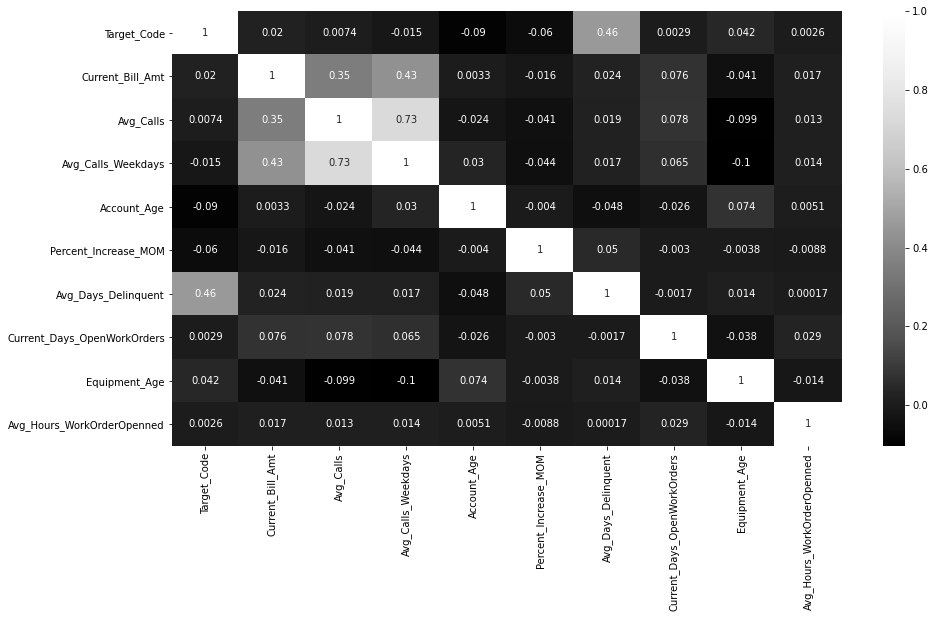

In [20]:
corr = data.corr() 
plt.figure(figsize=(15,8)) 
sns.heatmap(corr, \
            xticklabels=corr.columns.values, \
            yticklabels=corr.columns.values,annot=True,cmap='Greys_r') 
corr 

### Univariate Analysis

Text(0, 0.5, 'No of Customers')

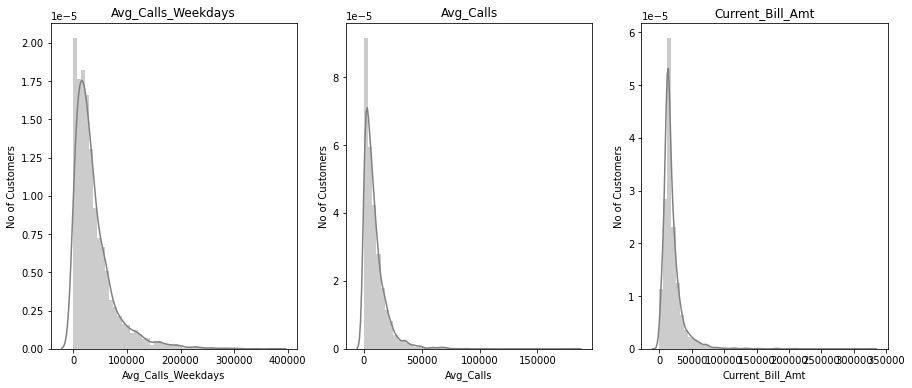

In [21]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6)) 
sns.distplot(data.Avg_Calls_Weekdays, kde=True, \
             color="gray", \
             ax=axes[0]).set_title('Avg_Calls_Weekdays') 
axes[0].set_ylabel('No of Customers') 
sns.distplot(data.Avg_Calls, kde=True, color="gray", \
             ax=axes[1]).set_title('Avg_Calls') 
axes[1].set_ylabel('No of Customers') 
sns.distplot(data.Current_Bill_Amt, kde=True, color="gray", \
             ax=axes[2]).set_title('Current_Bill_Amt') 
axes[2].set_ylabel('No of Customers') 

### Bivariate Analysis

Text(0.5, 1.0, 'Customer Complaint Code Distribution')

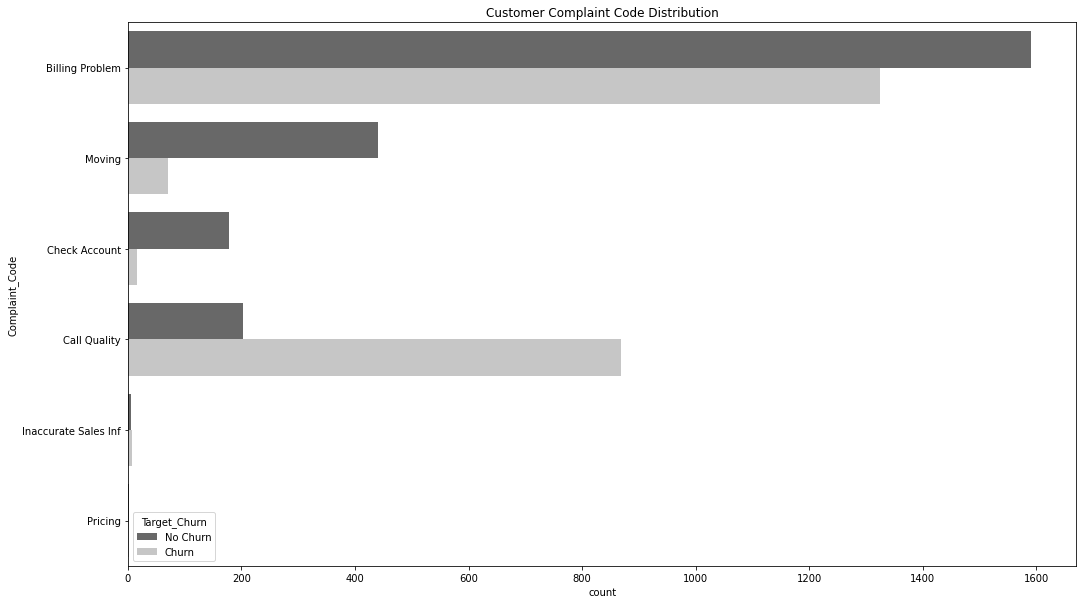

In [22]:
plt.figure(figsize=(17,10)) 
p=sns.countplot(y="Complaint_Code", hue='Target_Churn', \
                data=data,palette="Greys_r") 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Complaint Code Distribution') 

Text(0.5, 1.0, 'Customer Acct_Plan_Subtype Distribution')

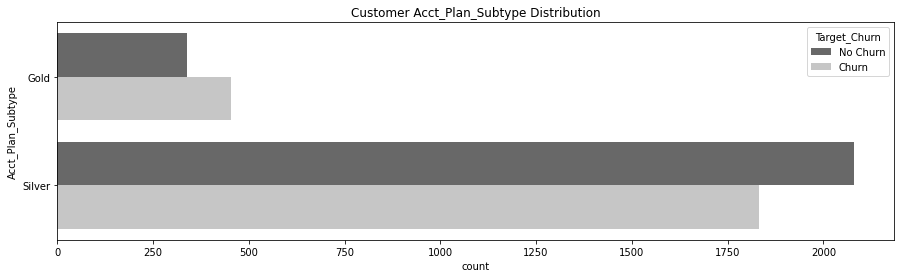

In [23]:
plt.figure(figsize=(15,4)) 
p=sns.countplot(y="Acct_Plan_Subtype", hue='Target_Churn', \
                data=data,palette="Greys_r") 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Acct_Plan_Subtype Distribution') 

Text(0.5, 1.0, 'Customer Current_TechSupComplaints Distribution')

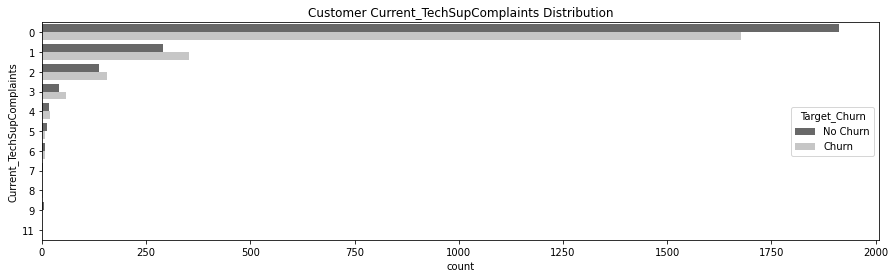

In [24]:
plt.figure(figsize=(15,4)) 
p=sns.countplot(y="Current_TechSupComplaints", hue='Target_Churn', \
                data=data,palette="Greys_r") 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Current_TechSupComplaints Distribution') 

Text(0.5, 1.0, 'Average No of Days Deliquent/Defalulted from paying - churn vs no churn')

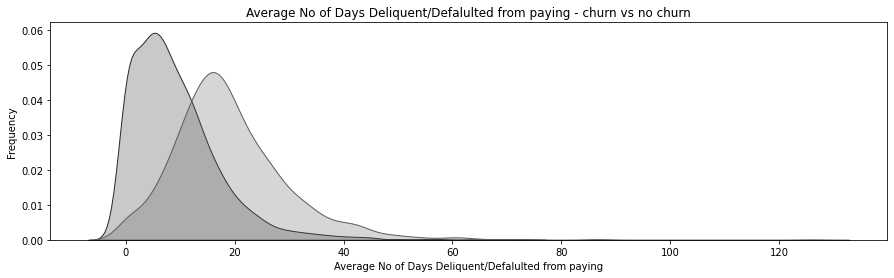

In [25]:
plt.figure(figsize=(15,4)) 
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 0), \
                        'Avg_Days_Delinquent'] , \
               color=sns.color_palette("Greys_r")[0],\
               shade=True,label='no churn') 
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 1),\
                        'Avg_Days_Delinquent'] , \
               color=sns.color_palette("Greys_r")[1],\
               shade=True, label='churn') 
ax.set(xlabel='Average No of Days Deliquent/Defalulted \
from paying', ylabel='Frequency') 
plt.title('Average No of Days Deliquent/Defalulted from \
paying - churn vs no churn')

Text(0.5, 1.0, 'Account_Age - churn vs no churn')

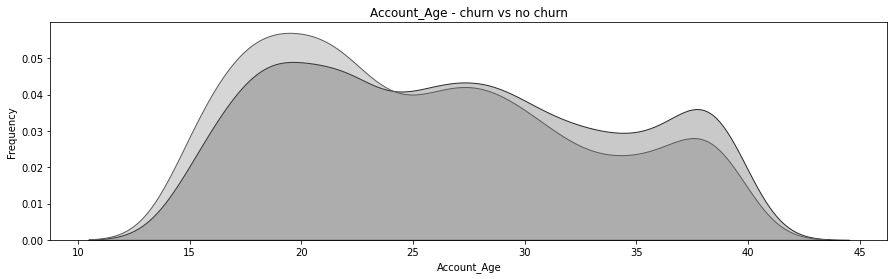

In [26]:
plt.figure(figsize=(15,4)) 
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 0), \
                        'Account_Age'], \
               color=sns.color_palette("Greys_r")[0], \
               shade=True,label='no churn') 
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 1), \
                        'Account_Age'], \
               color=sns.color_palette("Greys_r")[1] ,\
               shade=True, label='churn') 
ax.set(xlabel='Account_Age', ylabel='Frequency') 
plt.title('Account_Age - churn vs no churn') 

Text(0.5, 1.0, 'Percent_Increase_MOM- churn vs no churn')

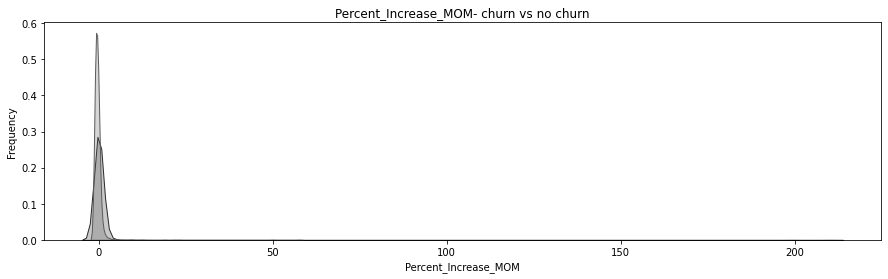

In [27]:
plt.figure(figsize=(15,4)) 
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 0), \
                        'Percent_Increase_MOM'], \
               color=sns.color_palette("Greys_r")[0], \
               shade=True, label='no churn') 
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 1), \
                        'Percent_Increase_MOM'], \
               color=sns.color_palette("Greys_r")[1], \
               shade=True, label='churn') 
ax.set(xlabel='Percent_Increase_MOM', ylabel='Frequency') 
plt.title('Percent_Increase_MOM- churn vs no churn')

### Feature Selection

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [29]:
data["Acct_Plan_Subtype"] = data["Acct_Plan_Subtype"]\
.astype('category').cat.codes 
data["Complaint_Code"] = data["Complaint_Code"]\
.astype('category').cat.codes 

In [30]:
data[["Acct_Plan_Subtype","Complaint_Code"]].head()

,Acct_Plan_Subtype,Complaint_Code
0,0,0
1,1,4
2,0,0
3,1,0
4,0,0


In [31]:
target = 'Target_Code' 
X = data.drop(['Target_Code','Target_Churn'], axis=1) 
y = data[target] 
X_train, X_test, y_train, y_test = train_test_split\
(X, y, test_size=0.15, \
 random_state=123, stratify=y)

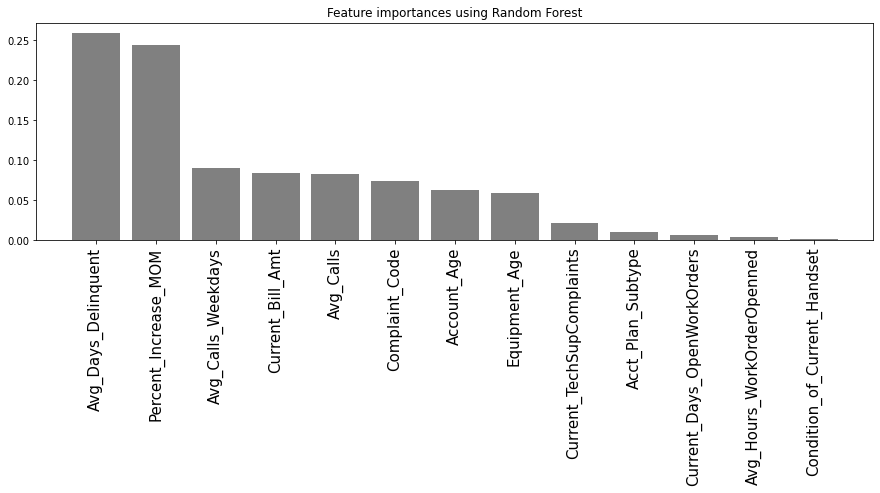

In [32]:
forest=RandomForestClassifier(n_estimators=500,random_state=1) 
forest.fit(X_train,y_train) 

importances=forest.feature_importances_ 
features = data.drop(['Target_Code','Target_Churn'],axis=1)\
.columns 
indices = np.argsort(importances)[::-1] 

plt.figure(figsize=(15,4)) 
plt.title("Feature importances using Random Forest") 
plt.bar(range(X_train.shape[1]), importances[indices],\
        color="gray", align="center") 
plt.xticks(range(X_train.shape[1]), features[indices], \
           rotation='vertical', fontsize=15) 
plt.xlim([-1, X_train.shape[1]])
plt.show()

### Logistic Regression

In [33]:
import statsmodels.api as sm 
top7_features = ['Avg_Days_Delinquent','Percent_Increase_MOM',\
                 'Avg_Calls_Weekdays','Current_Bill_Amt',\
                 'Avg_Calls','Complaint_Code','Account_Age'] 
logReg = sm.Logit(y_train, X_train[top7_features]) 
logistic_regression = logReg.fit() 

Optimization terminated successfully.
         Current function value: 0.551146
         Iterations 8


In [34]:
logistic_regression.summary
logistic_regression.params

Avg_Days_Delinquent     1.109226e-01
Percent_Increase_MOM   -3.922044e-01
Avg_Calls_Weekdays     -3.315366e-06
Current_Bill_Amt       -2.385475e-07
Avg_Calls              -1.817086e-06
Complaint_Code         -2.083688e-01
Account_Age            -4.794911e-02
dtype: float64

In [35]:
coef = logistic_regression.params 

def y (coef, Avg_Days_Delinquent, Percent_Increase_MOM, \
       Avg_Calls_Weekdays, Current_Bill_Amt, Avg_Calls, \
       Complaint_Code, Account_Age): 
    
    final_coef=coef[0]\
    *Avg_Days_Delinquent\
    +coef[1]*Percent_Increase_MOM\
    +coef[2]\
    *Avg_Calls_Weekdays\
    +coef[3]*Current_Bill_Amt\
    +coef[4]*Avg_Calls+coef[5]\
    *Complaint_Code+coef[6]\
    *Account_Age 

    return final_coef 

In [36]:
import numpy as np

# An Employee with 
# Avg_Days_Delinquent    40
# Percent_Increase_MOM   5
# Avg_Calls_Weekdays     39000
# Current_Bill_Amt       12000
# Avg_Calls              9000
# Complaint_Code         0
# Account_Age            17
# has 81 % chance of churn

y1 = y(coef, 40, 5, 39000,12000,9000,0,17)
p = np.exp(y1) / (1+np.exp(y1))
p

0.8193916658925811

## Activity 8.01

### Using Scikit Learn

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
clf_logistic = LogisticRegression(random_state=0,solver='lbfgs')\
.fit(X_train[top7_features], y_train) 

In [39]:
clf_logistic

LogisticRegression(random_state=0)

In [40]:
clf_logistic.score(X_test[top7_features], y_test)

0.7454031117397454

## SVM

In [42]:
from sklearn import svm

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train[top7_features])
X_train_svm = scaling.transform(X_train[top7_features])
X_test_svm = scaling.transform(X_test[top7_features])

In [43]:
clf_svm=svm.SVC(kernel='linear', C=1)

In [44]:
clf_svm

SVC(C=1, kernel='linear')

In [45]:
clf_svm.fit(X_train_svm,y_train)

SVC(C=1, kernel='linear')

In [46]:
clf_svm.score(X_test_svm, y_test)

0.7637906647807637

## Decision Tree

In [47]:
from sklearn import tree

In [48]:
clf_decision = tree.DecisionTreeClassifier()

In [49]:
clf_decision

DecisionTreeClassifier()

In [50]:
clf_decision.fit(X_train[top7_features],y_train)

DecisionTreeClassifier()

In [51]:
clf_decision.score(X_test[top7_features], y_test)

0.7538896746817539

## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
clf_random = RandomForestClassifier(n_estimators=20, \
                                    max_depth=None, \
                                    min_samples_split=7, \
                                    random_state=0) 

In [54]:
clf_random.fit(X_train[top7_features], y_train)

RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [55]:
clf_random.score(X_test[top7_features], y_test)

0.8104667609618105